In [ ]:
# Descargar datasets
!wget -O 'fallecidos_sinadef.csv' https://media.githubusercontent.com/media/miguelvg27/ia-pucp-dv-trabajo/main/data/fallecidos_sinadef.csv # dataset sinadef
!wget -O 'pop-peru_2023_wikipedia.csv' https://raw.githubusercontent.com/miguelvg27/ia-pucp-dv-trabajo/main/data/pop-peru_2023_wikipedia.csv # dataset población Perú
!wget -O 'peru_departamental_simple.geojson' https://raw.githubusercontent.com/miguelvg27/ia-pucp-dv-trabajo/main/data/peru_departamental_simple.geojson # polígonos por departamento

--2023-11-15 03:59:06--  https://media.githubusercontent.com/media/miguelvg27/ia-pucp-dv-trabajo/main/data/fallecidos_sinadef.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 357673838 (341M) [text/plain]
Saving to: ‘fallecidos_sinadef.csv’

fallecidos_sinadef. 100%[===================>] 341.10M   112MB/s    in 3.0s    

2023-11-15 03:59:14 (112 MB/s) - ‘fallecidos_sinadef.csv’ saved [357673838/357673838]

--2023-11-15 03:59:14--  https://raw.githubusercontent.com/miguelvg27/ia-pucp-dv-trabajo/main/data/pop-peru_2023_wikipedia.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connec

In [ ]:
# instalar y reiniciar entorno
!pip install -U kaleido
!apt-get install imagemagick
!pip install Wand

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  imagemagick-6.q16 libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10 libwmflite-0.2-7 netpbm
  poppler-data
Suggested packages:
  fonts-noto fonts-free

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import plotly
import io
import PIL
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Gráfico 3 - Miguel Vega

In [ ]:
# Se genera df de población, se agrega una fila con la población total del Perú
pop_df=pd.read_csv("pop-peru_2023_wikipedia.csv",engine="python",encoding='utf-8',sep="|")
pop_peru_df = pd.DataFrame({'dep': ['PERU'], 'pop': [pop_df['pop'].sum()]})
pop_df = pd.concat([pop_df, pop_peru_df], ignore_index=True)
pop_df.set_index('dep', inplace=True)
pop_df.count()

pop    26
dtype: int64

In [ ]:
# Se genera un df con la agregación de cantidad de muertes por mes y departamento/ciudad
df=pd.read_csv("fallecidos_sinadef.csv",engine="python",encoding='utf-8',sep="|")
df['mes'] = pd.to_datetime(df['FECHA']).dt.strftime('%Y-%m')
df['dep'] = df['DEPARTAMENTO DOMICILIO'].str.strip()
sinadf = df[df['dep'].ne('') & df['dep'].notna()].groupby(['dep', 'mes']).size().reset_index(name='deaths')
sinadf

,dep,mes,deaths
0,AICHI,2020-08,1
1,AMAZONAS,2017-01,56
2,AMAZONAS,2017-02,60
3,AMAZONAS,2017-03,79
4,AMAZONAS,2017-04,58
...,...,...,...
2411,[NO DEFINIDO],2020-08,7
2412,[NO DEFINIDO],2020-09,5
2413,[NO DEFINIDO],2020-10,4
2414,[NO DEFINIDO],2020-11,1


In [ ]:
# Se genera un df con solamente los datos del Perú, se agregan las filas consolidadas para Perú por mes
depPeru = ['AMAZONAS','ANCASH','APURIMAC','AREQUIPA','AYACUCHO','CAJAMARCA','CALLAO','CUSCO','HUANCAVELICA','HUANUCO','ICA','JUNIN','LA LIBERTAD','LAMBAYEQUE','LIMA','LORETO','MADRE DE DIOS','MOQUEGUA','PASCO','PIURA','PUNO','SAN MARTIN','TACNA','TUMBES','UCAYALI']
sinadf_peru = sinadf[sinadf['dep'].isin(depPeru) & (sinadf['mes'] >= '2018-01') & (sinadf['mes'] <= '2023-09')].copy()
sumRow = sinadf_peru.groupby('mes').sum('deaths').reset_index()
sumRow['dep'] = 'PERU'
sinadf_peru = pd.concat([sinadf_peru, sumRow], ignore_index=True)
sinadf_peru['pop'] = sinadf_peru['dep'].map(pop_df['pop'])
sinadf_peru

,dep,mes,deaths,pop
0,AMAZONAS,2018-01,77,458022
1,AMAZONAS,2018-02,62,458022
2,AMAZONAS,2018-03,78,458022
3,AMAZONAS,2018-04,76,458022
4,AMAZONAS,2018-05,77,458022
...,...,...,...,...
1785,PERU,2023-05,8719,36769584
1786,PERU,2023-06,7784,36769584
1787,PERU,2023-07,7610,36769584
1788,PERU,2023-08,7435,36769584


In [ ]:
# Se genera un df de los top 5 departamentos y el Perú, se realiza la suma acumulada
depTop = ['PERU','LIMA','LA LIBERTAD','PIURA','AREQUIPA','CAJAMARCA']
sinadf_top = sinadf_peru[sinadf_peru['dep'].isin(depTop)].copy()
sinadf_top.sort_values(by=['dep','mes'], inplace=True)
sinadf_top['deaths_cumsum'] = sinadf_top.groupby('dep')['deaths'].cumsum()
sinadf_top['deaths_cumsum_per10k'] = (sinadf_top['deaths_cumsum'] / sinadf_top['pop']) * 10000
sinadf_top

,dep,mes,deaths,pop,deaths_cumsum,deaths_cumsum_per10k
207,AREQUIPA,2018-01,387,1523839,387,2.539638
208,AREQUIPA,2018-02,381,1523839,768,5.039903
209,AREQUIPA,2018-03,432,1523839,1200,7.874848
210,AREQUIPA,2018-04,423,1523839,1623,10.650731
211,AREQUIPA,2018-05,477,1523839,2100,13.780983
...,...,...,...,...,...,...
1371,PIURA,2023-05,365,2138730,50200,234.718735
1372,PIURA,2023-06,291,2138730,50491,236.079356
1373,PIURA,2023-07,238,2138730,50729,237.192165
1374,PIURA,2023-08,229,2138730,50958,238.262894


In [ ]:
# Se genera el gráfico
depColors = ['black','yellow','green','purple','red','blue']
colorMap = dict(zip(depTop, depColors))
max_x = sinadf_top['deaths_cumsum_per10k'].max() + 5
fig = px.bar(sinadf_top,
             title = 'Fallecidos por cada 10k habitantes en el Top 5 departamentos del Perú (2018-01 a 2023-09)',
             y = 'dep',
             x = 'deaths_cumsum_per10k',
             color = 'dep',
             color_discrete_map = colorMap,
             text = 'deaths_cumsum_per10k',
             animation_frame="mes",
             animation_group="dep",
             range_x=[0,max_x],
             hover_data=['mes'],
             width=800, height=500)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_traces(hovertemplate='departamento=%{y}<br>fallecidos_por10k=%{x:.2f}<br>mes=%{customdata[0]}')
fig.update_layout(showlegend=False,
                  xaxis_tickfont_color='white', #coloca ticks color blanco para que no se descuadre el título del eje
                  xaxis_title_text='Acumulado de fallecidos por cada 10k habitantes',
                  yaxis_title=None,
                  yaxis={'categoryorder':'total ascending'})
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 75
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
fig

In [ ]:
# Se exporta el gráfico
frames = []
for s, fr in enumerate(fig.frames):
    fig.update(data=fr.data)
    fig.layout.sliders[0].update(active=s)
    frames.append(PIL.Image.open(io.BytesIO(fig.to_image(format="png"))))

frames[0].save(
        "dv-grupo3-miguel.gif",
        save_all=True,
        append_images=frames[1:],
        optimize=True,
        duration=150,
        loop=0,
    )

# Gráfico 1 - Carlos Raymundo

In [ ]:
# Importamos la librería
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import urllib
import subprocess
import glob
from PIL import Image
from IPython.display import display, Image

In [ ]:
# Se crea el DataFrame

df=pd.read_csv("fallecidos_sinadef.csv",engine="python",encoding='utf-8',sep="|")
dfm=df

In [ ]:
# Visualizamos la cabecera

df.head()

,Nº,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,ETNIA,COD# UBIGEO DOMICILIO,PAIS DOMICILIO,...,DEBIDO A (CAUSA B),CAUSA B (CIE-X),DEBIDO A (CAUSA C),CAUSA C (CIE-X),DEBIDO A (CAUSA D),CAUSA D (CIE-X),DEBIDO A (CAUSA E),CAUSA E (CIE-X),DEBIDO A (CAUSA F),CAUSA F (CIE-X)
0,1,SIS,MASCULINO,40,AÑOS,SOLTERO,SECUNDARIA COMPLETA,SIN CLASIFICACIÓN,92-33-24-01-01-000,PERU,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
1,2,ESSALUD,MASCULINO,97,AÑOS,CASADO,PRIMARIA INCOMPLETA,MESTIZO,92-33-04-01-23-000,PERU,...,ENFERMEDAD RENAL,N189,ENFERMEDAD PULMONAR INTERSTICIAL DIFUSA,J849,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
2,3,IGNORADO,FEMENINO,64,AÑOS,SOLTERO,IGNORADO,MESTIZO,92-33-24-01-01-000,PERU,...,INFARTO RECIENTE Y ANTIGUO DE MIOCARDIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,SIS,FEMENINO,15,MINUTOS,SOLTERO,SUPERIOR NO UNIV. COMP.,MESTIZO,92-33-12-08-06-000,PERU,...,DIFICULTAD RESPIRATORIA DEL RECIEN NACIDO,P229,INMATURIDAD EXTREMA,P072,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
4,5,SIS,MASCULINO,67,AÑOS,SOLTERO,IGNORADO,MESTIZO,92-33-12-04-04-000,PERU,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO


In [ ]:
# Se imprime el shape y las columnas

print(df.shape)
print(df.columns)

(1039917, 32)
Index(['Nº', 'TIPO SEGURO', 'SEXO', 'EDAD', 'TIEMPO EDAD', 'ESTADO CIVIL',
       'NIVEL DE INSTRUCCIÓN', 'ETNIA', 'COD# UBIGEO DOMICILIO',
       'PAIS DOMICILIO', 'DEPARTAMENTO DOMICILIO', 'PROVINCIA DOMICILIO',
       'DISTRITO DOMICILIO', 'FECHA', 'AÑO', 'MES', 'TIPO LUGAR',
       'INSTITUCION', 'MUERTE VIOLENTA', 'NECROPSIA', 'DEBIDO A (CAUSA A)',
       'CAUSA A (CIE-X)', 'DEBIDO A (CAUSA B)', 'CAUSA B (CIE-X)',
       'DEBIDO A (CAUSA C)', 'CAUSA C (CIE-X)', 'DEBIDO A (CAUSA D)',
       'CAUSA D (CIE-X)', 'DEBIDO A (CAUSA E)', 'CAUSA E (CIE-X)',
       'DEBIDO A (CAUSA F)', 'CAUSA F (CIE-X)'],
      dtype='object')


In [ ]:
# Se va a spearar la columna mes y anho verificando si tienen nulos y se convierte la columna fecha en formato Y M D

import pandas as pd
from datetime import datetime

# Aqui se verifica si 'FECHA' contiene valores nulos y elimina las filas con valores nulos
df = df.dropna(subset=['FECHA'])

# Convierte la columna 'FECHA' en objetos de tipo fecha y hora y almacénalos en 'DATE'
df['DATE'] = df['FECHA'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df = df.sort_values(by=['DATE'], ascending=True)
df=df[(df["PAIS DOMICILIO"]=="PERU") & (df["AÑO"].isin([2020,2021,2022,2023]))]
df["DEPARTAMENTO DOMICILIO"] = df["DEPARTAMENTO DOMICILIO"].map(str.strip)
df=df[df["DEPARTAMENTO DOMICILIO"]!=""]
df["MES-AÑO"]=df["FECHA"].apply(lambda x: x[:5])+df["FECHA"].apply(lambda x: x[5:7])
df=df[['DEPARTAMENTO DOMICILIO',"MES-AÑO","SEXO"]]

In [ ]:
#  Se procesa datos sobre géneros en diferentes departamentos y meses, creando un conjunto de resultados que representa el recuento máximo de géneros para cada mes en cada departamento.

result=[]
max=0
for dep in df["DEPARTAMENTO DOMICILIO"].unique():
  data={}
  sdf=df[df["DEPARTAMENTO DOMICILIO"]==dep]
  sdf=sdf.groupby(sdf['MES-AÑO']).count().reset_index()
  for date in df['MES-AÑO'].unique():
    try:
      data[date]=sdf[sdf["MES-AÑO"]==date]["SEXO"].values[0]
    except IndexError:
      data[date]=0
    if data[date]>max:
      max=data[date]
  result.append(data)

In [ ]:
# Se crea un DataFrame final con los cambios hechos

final_df=pd.DataFrame(result,index=df["DEPARTAMENTO DOMICILIO"].unique())
final_df.sort_index(inplace=True)

In [ ]:
# Se obtiene informacion actual de la poblacion desde WIKIPEDIA

base_url="https://es.wikipedia.org/wiki/"
query='Anexo:Departamentos_del_Perú_por_población'
query=urllib.parse.quote(query)
url=base_url+query
url
pop_df=pd.read_html(url)[0]

In [ ]:
#Visualizamos entonces el DataSet de WIKi

pop_df

Ubigeo            Departamento           Capital Superficie (km²)  \
   Ubigeo            Departamento           Capital Superficie (km²)   
0       1                Amazonas       Chachapoyas        39 249,13   
1       2                  Áncash            Huaraz        35 914,81   
2       3                Apurímac           Abancay        20 895,79   
3       4                Arequipa          Arequipa        63 345,39   
4       5                Ayacucho          Ayacucho        43 814,80   
5       6               Cajamarca         Cajamarca        33 317,54   
6       7              Callao[4]​            Callao            14698   
7       8                   Cusco             Cusco        71 986,50   
8       9            Huancavelica      Huancavelica        22 131,47   
9      10                 Huánuco           Huánuco        36 848,85   
10     11                     Ica               Ica        21 327,83   
11     12                   Junín          Huancayo        44 197,23   
12     13             La Libertad          Trujillo         25 499,9   
13     14              Lambayeque          Chiclayo         14 231,3   
14     15  Lima Metropolitana[5]​              Lima           267228   
15     16         Lima Provincias            Huacho        34 801,59   
16     17                  Loreto           Iquitos       368 851,95   
17     18           Madre de Dios  Puerto Maldonado        85 300,54   
18     19                Moquegua          Moquegua        15 733,97   
19     20                   Pasco    Cerro de Pasco        25 319,59   
20     21                   Piura             Piura        35 892,49   
21     22                    Puno              Puno        71 999,00   
22     23              San Martín         Moyobamba        51 253,31   
23     24                   Tacna             Tacna        16 075,89   
24     25                  Tumbes            Tumbes           466920   
25     26                 Ucayali          Pucallpa       102 410,55   

    Población               Densidad 2017 (hab/km²) Ubicación  
   Censo 2017 Estimado 2023 Densidad 2017 (hab/km²) Ubicación  
0     379 384        458022                    9.66       NaN  
1   1 083 519       1202828                   30.17       NaN  
2     405 759        436820                   19.42       NaN  
3   1 382 730       1523839                   21.83       NaN  
4     616 176        671182                   14.06       NaN  
5   1 341 012       1503836                   40.25       NaN  
6     994 494       1147628                 6766.19       NaN  
7   1 205 527       1428028                   16.75       NaN  
8     347 639        371038                   15.71       NaN  
9     721 047        782039                   19.57       NaN  
10    850 765       1004829                   39.89       NaN  
11  1 246 038       1418738                   28.19       NaN  
12  1 778 080       2078028                   69.73       NaN  
13  1 197 260       1367029                   69.73       NaN  
14  9 612 705      11810722                 3208.86       NaN  
15    910 431       1092827                  272.56       NaN  
16    883 510       1138637                    2.40       NaN  
17    141 070        184083                    1.65       NaN  
18    174 863        200973                   11.11       NaN  
19    254 065        278028                   10.03       NaN  
20  1 856 809       2138730                   51.73       NaN  
21  1 172 697       1268093                   16.28       NaN  
22    813 381        924292                   15.87       NaN  
23    329 332        397737                   20.49       NaN  
24    224 863        280723                   48.16       NaN  
25    496 459        568028                    4.85       NaN

In [ ]:
# Se obtiene la informacion de la poblacion a un estimado dado por wiki extrayendo esa columna

pop_array = pop_df[("Población", "Estimado 2023")].astype(str).apply(lambda x: int(x.replace("\xa0", ""))).values
pop_array[14] = pop_array[14] + pop_array[15]
pop_array = np.delete(pop_array, 15)

In [ ]:
# Se realiza una normalización de las columnas en el DataFrame final_df para obtener tasas per cápita por millón de habitantes, que hace mas facil el analisis
for date in final_df.columns:
  final_df[date]=(final_df[date]/pop_array)*np.full([len(pop_array)],1000000)


In [ ]:
# Se adquiere el geojson donde muestra los POLYGONs de cada departamento del Peru

df_peru = gpd.read_file('peru_departamental_simple.geojson')
df_peru.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


In [ ]:
# Almacenamos las coordenadas de los puntos representativos de las geometrías en el DataFrame. Estos puntos representativos podrían ser utilizados para etiquetar gráficamente las regiones geográficas en nuestro mapa.


df_peru['coords'] = df_peru['geometry'].apply(lambda x: x.representative_point().coords[:])
df_peru['coords'] = [coords[0] for coords in df_peru['coords']]

In [ ]:
# Aqui se generan las images por mes y departamentos dando una leyenda de mayor tamanho entre el anho 2020 al 2023

# Plot function
def plot(month,i,vmin,vmax,dep=None):
  references='References: SINADEF, INEI, Wikipedia'
  df_peru[month]=final_df[month].values
  fig, ax = plt.subplots(1, figsize=(20, 18))
  if dep is None:
    df_peru_to_plot=df_peru
    description="Muertes por departamento, ajustado por población desde el 2020 al 2023"
  else:
    df_peru_to_plot=df_peru[df_peru["NOMBDEP"]==dep]
    description=f"Muertes en {dep} ajustado por población"
  df_peru_to_plot.plot(column=month,cmap='cool',
  linewidth=1,ax=ax, edgecolor='1', vmin=vmin, vmax=vmax,legend=False,
  norm=plt.Normalize(vmin=vmin, vmax=vmax))

 # Obtener la barra de colores actual
  cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', shrink=0.9)

# Aumentar el tamaño de los ticks de la barra de colores
  cbar.ax.tick_params(labelsize=18)  # Ajustar el tamaño de las etiquetas de los ticks


  ax.axis("off")
  ax.set_title(f"{month}",fontsize=30)
  ax.set_title(f"{month}",fontsize=30, weight='bold')
  for idx, row in df_peru.iterrows():
    ax.text(row.coords[0], row.coords[1], row["NOMBDEP"],
    horizontalalignment='center',
    bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})
  ax.annotate(description, xy=(0.15, .95), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='bottom',
            fontsize=30)
  ax.annotate(references, xy=(0.62, 0.1), xycoords='figure fraction',
            horizontalalignment='right', verticalalignment='top',
            fontsize=20, style='italic')
  ax.annotate("Muertes por millón de habitantes", xy=(0.93, 0.91), xycoords='figure fraction',
            horizontalalignment='right', verticalalignment='top',
            fontsize=22, style='italic')
  if i<10:
    filepath = f"img/00{i}.jpg"
  else:
    filepath = f"img/0{i}.jpg"

  chart = ax.get_figure()
  chart.savefig(filepath, dpi=200)
  plt.close()
  df_peru.drop(columns=month, inplace=True)
  return filepath


In [ ]:
# Se generan las images creando una carpeta de imagenes 'content/img' donde se muestren el mapa del Peru con las muertes por mes desde el 2020/01 al 2023/10

if not os.path.exists("img"):
  os.mkdir("img")
vmin, vmax=0,final_df.max().max()
df.columns
i=1
for month in final_df.columns.values:
  filepath=plot(month,i,vmin,vmax)
  print(f"{i} of {len(final_df.columns)} processed")
  i+=1
  if final_df.sum().idxmax()==month:
    worst_month_chart_path=filepath

1 of 46 processed
2 of 46 processed
3 of 46 processed
4 of 46 processed
5 of 46 processed
6 of 46 processed
7 of 46 processed
8 of 46 processed
9 of 46 processed
10 of 46 processed
11 of 46 processed
12 of 46 processed
13 of 46 processed
14 of 46 processed
15 of 46 processed
16 of 46 processed
17 of 46 processed
18 of 46 processed
19 of 46 processed
20 of 46 processed
21 of 46 processed
22 of 46 processed
23 of 46 processed
24 of 46 processed
25 of 46 processed
26 of 46 processed
27 of 46 processed
28 of 46 processed
29 of 46 processed
30 of 46 processed
31 of 46 processed
32 of 46 processed
33 of 46 processed
34 of 46 processed
35 of 46 processed
36 of 46 processed
37 of 46 processed
38 of 46 processed
39 of 46 processed
40 of 46 processed
41 of 46 processed
42 of 46 processed
43 of 46 processed
44 of 46 processed
45 of 46 processed
46 of 46 processed


In [ ]:
# hacemos que el procesador extraiga las images de la carpeta creada

import os

# Ruta al directorio que deseas crear
directory_path = "img"

# Crea el directorio si no existe
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Ahora puedes cambiar al directorio "img" y realizar las operaciones necesarias
os.chdir(directory_path)

In [ ]:
# Debido a que este procesamiento requiere mucha RAM se divide las images en LOTES (Batch) para que cubran todas las images creadas

import subprocess
import os

# Guarda el directorio de trabajo actual
back = os.getcwd()

# Cambia al directorio que contiene las imágenes
os.chdir("/content/img/")

# Obtén la lista de archivos JPEG en el directorio
jpeg_files = [file for file in os.listdir() if file.lower().endswith(".jpg")]

# Ordena los archivos alfabéticamente en el formato 001.jpg, 002.jpg, ..., 046.jpg)
jpeg_files.sort()

# Verifica que haya al menos un archivo JPEG
if jpeg_files:
    # Establece el tamaño del lote para cada GIF
    batch_sizes = [20, 20, 6]

    # Itera sobre los tamaños de lote y llama a la utilidad "convert" para cada lote
    for i, batch_size in enumerate(batch_sizes):
        batch = jpeg_files[:batch_size]
        jpeg_files = jpeg_files[batch_size:]  # Elimina las imágenes ya procesadas

        # Llama a la utilidad "convert" para crear el archivo GIF
        subprocess.call([
            "convert", "-delay", "90", "-loop", "0", *batch, "-resize", "800x600", "-layers", "optimize", "-format", f"gif", f"output_batch_{i + 1}.gif"
        ])

else:
    print("No se encontraron archivos JPEG en el directorio.")

# Restaura el directorio de trabajo original
os.chdir(back)

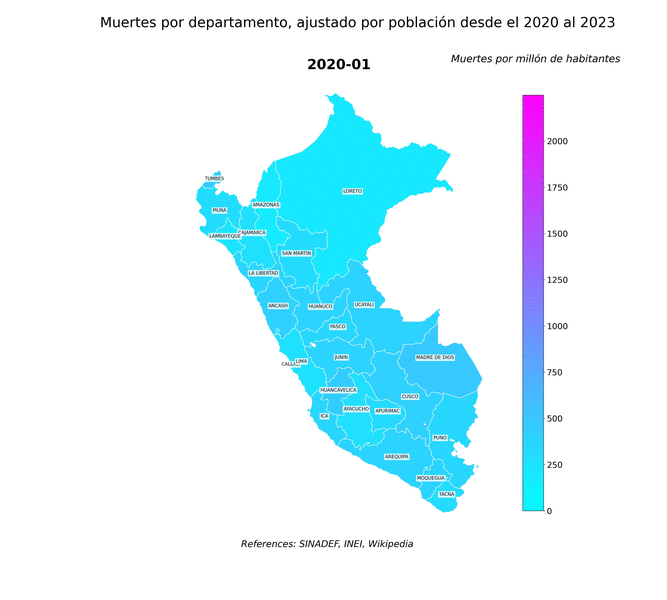

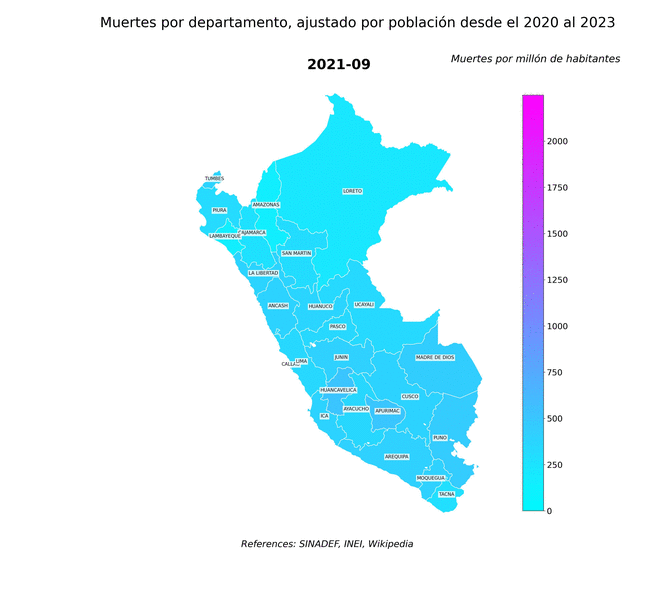

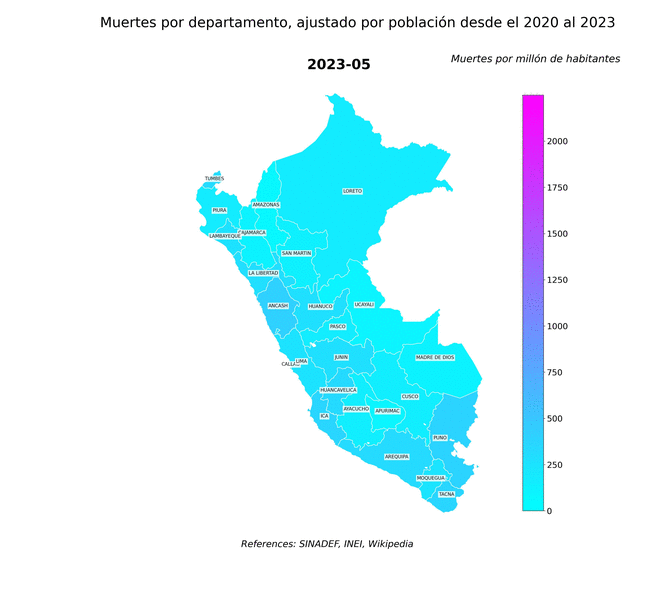

In [ ]:
from IPython.display import display, Image

# Rutas de los archivos GIF
archivos_gif = ['/content/img/output_batch_1.gif', '/content/img/output_batch_2.gif', '/content/img/output_batch_3.gif']

# Muestra cada archivo GIF
for archivo_gif in archivos_gif:
    with open(archivo_gif, 'rb') as f:
        display(Image(data=f.read(), format='png'))

# Gráfico 2 - Mario Mena

In [ ]:
# se muestra el dataset
dfm.head()

,Nº,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,ETNIA,COD# UBIGEO DOMICILIO,PAIS DOMICILIO,...,DEBIDO A (CAUSA B),CAUSA B (CIE-X),DEBIDO A (CAUSA C),CAUSA C (CIE-X),DEBIDO A (CAUSA D),CAUSA D (CIE-X),DEBIDO A (CAUSA E),CAUSA E (CIE-X),DEBIDO A (CAUSA F),CAUSA F (CIE-X)
0,1,SIS,MASCULINO,40,AÑOS,SOLTERO,SECUNDARIA COMPLETA,SIN CLASIFICACIÓN,92-33-24-01-01-000,PERU,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
1,2,ESSALUD,MASCULINO,97,AÑOS,CASADO,PRIMARIA INCOMPLETA,MESTIZO,92-33-04-01-23-000,PERU,...,ENFERMEDAD RENAL,N189,ENFERMEDAD PULMONAR INTERSTICIAL DIFUSA,J849,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
2,3,IGNORADO,FEMENINO,64,AÑOS,SOLTERO,IGNORADO,MESTIZO,92-33-24-01-01-000,PERU,...,INFARTO RECIENTE Y ANTIGUO DE MIOCARDIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,SIS,FEMENINO,15,MINUTOS,SOLTERO,SUPERIOR NO UNIV. COMP.,MESTIZO,92-33-12-08-06-000,PERU,...,DIFICULTAD RESPIRATORIA DEL RECIEN NACIDO,P229,INMATURIDAD EXTREMA,P072,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
4,5,SIS,MASCULINO,67,AÑOS,SOLTERO,IGNORADO,MESTIZO,92-33-12-04-04-000,PERU,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO


In [ ]:
#datos tipos NAN
#no necesariamente está mal este dato pues puede ser que para dicha característica no colocaron nada
dfm.isna().sum().sum()

1583067

In [ ]:
# Palabra a buscar
palabra_a_buscar = 'covid'
# Encontrar la palabra en el dataset dfm
mask = dfm.stack().str.lower().str.contains(palabra_a_buscar.lower())
dfm2 = dfm.loc[mask.any(level=0)]
# Imprimir el nuevo dataset df2
print(dfm2)

<ipython-input-30-d4bb924788e2>:5: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.any(level=1) should use df.groupby(level=1).any()



            Nº  TIPO SEGURO       SEXO EDAD TIEMPO EDAD  ESTADO CIVIL  \
10          11      USUARIO   FEMENINO   50        AÑOS       SOLTERO   
17          18     IGNORADO   FEMENINO   65        AÑOS  SIN REGISTRO   
28          29          SIS   FEMENINO   57        AÑOS        CASADO   
35          36  SANIDAD FAP  MASCULINO   17        AÑOS       SOLTERO   
36          37      ESSALUD  MASCULINO   30        AÑOS       SOLTERO   
...        ...          ...        ...  ...         ...           ...   
767392  767393          SIS  MASCULINO   57        AÑOS       SOLTERO   
767425  767426      ESSALUD  MASCULINO   90        AÑOS        CASADO   
767435  767436      ESSALUD   FEMENINO   84        AÑOS        CASADO   
767606  767607          SIS  MASCULINO   83        AÑOS       SOLTERO   
767655  767656      ESSALUD  MASCULINO   42        AÑOS       SOLTERO   

           NIVEL DE INSTRUCCIÓN      ETNIA COD# UBIGEO DOMICILIO  \
10                     IGNORADO    MESTIZO    92-33-09-

In [ ]:
# ordenamos los datos originales
dfm['DATE'] = dfm['FECHA'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
dfm = dfm.sort_values(by=['DATE'], ascending=True)
dfm=dfm[(dfm["PAIS DOMICILIO"]=="PERU") & (dfm["AÑO"].isin([2020,2021,2022]))]
dfm["DEPARTAMENTO DOMICILIO"] = dfm["DEPARTAMENTO DOMICILIO"].map(str.strip)
dfm=dfm[dfm["DEPARTAMENTO DOMICILIO"]!=""]
dfm["MES-AÑO"]=dfm["FECHA"].apply(lambda x: x[:5])+dfm["FECHA"].apply(lambda x: x[5:7])
dfm=dfm[['DEPARTAMENTO DOMICILIO',"MES-AÑO","SEXO"]]

In [ ]:
# ordeno los datos Covid 19
dfm2['DATE'] = dfm2['FECHA'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
dfm2 = dfm2.sort_values(by=['DATE'], ascending=True)
dfm2=dfm2[(dfm2["PAIS DOMICILIO"]=="PERU") & (dfm2["AÑO"].isin([2020,2021,2022]))]
dfm2["DEPARTAMENTO DOMICILIO"] = dfm2["DEPARTAMENTO DOMICILIO"].map(str.strip)
dfm2=dfm2[dfm2["DEPARTAMENTO DOMICILIO"]!=""]
dfm2["MES-AÑO"]=dfm2["FECHA"].apply(lambda x: x[:5])+dfm2["FECHA"].apply(lambda x: x[5:7])
dfm2=dfm2[['DEPARTAMENTO DOMICILIO',"MES-AÑO","SEXO"]]

In [ ]:
# ordeno nuevamente los datos totales
resultm=[]
max=0
for dep in dfm["DEPARTAMENTO DOMICILIO"].unique():
  data={}
  sdfm=dfm[dfm["DEPARTAMENTO DOMICILIO"]==dep]
  sdfm=sdfm.groupby(sdfm['MES-AÑO']).count().reset_index()
  for date in dfm['MES-AÑO'].unique():
    try:
      data[date]=sdfm[sdfm["MES-AÑO"]==date]["SEXO"].values[0]
    except IndexError:
      data[date]=0
    if data[date]>max:
      max=data[date]
  resultm.append(data)

In [ ]:
# ordeno nuevamente los datos Covid 19
resultc=[]
max=0
for dep in dfm2["DEPARTAMENTO DOMICILIO"].unique():
  datac={}
  sdfcm2=dfm2[dfm2["DEPARTAMENTO DOMICILIO"]==dep]
  sdfcm2=sdfcm2.groupby(sdfcm2['MES-AÑO']).count().reset_index()
  for date in dfm2['MES-AÑO'].unique():
    try:
      datac[date]=sdfcm2[sdfcm2["MES-AÑO"]==date]["SEXO"].values[0]
    except IndexError:
      datac[date]=0
    if datac[date]>max:
      max=datac[date]
  resultc.append(datac)

In [ ]:
final_dfm=pd.DataFrame(resultm,index=dfm["DEPARTAMENTO DOMICILIO"].unique())
final_dfm.sort_index(inplace=True)

In [ ]:
final_dfc=pd.DataFrame(resultc,index=dfm2["DEPARTAMENTO DOMICILIO"].unique())
final_dfc.sort_index(inplace=True)

In [ ]:
base_url="https://es.wikipedia.org/wiki/"
query='Anexo:Departamentos_del_Perú_por_población'
query=urllib.parse.quote(query)
url=base_url+query
url
pop_df=pd.read_html(url)[0]

In [ ]:
pop_array=pop_df[("Población","Estimado 2023")].values # pop_array=pop_df[("Población","Estimado 2023")].apply(lambda x: int(x.replace("\xa0",""))).values
pop_array
pop_array[14]=pop_array[14]+pop_array[15]
pop_array=np.delete(pop_array,15)

In [ ]:
# dato original
for date in final_dfm.columns:
  final_dfm[date]=(final_dfm[date]/pop_array)*np.full([len(pop_array)],1000000)

In [ ]:
# dato dfc "covid"
for date in final_dfc.columns:
  final_dfc[date]=(final_dfc[date]/pop_array)*np.full([len(pop_array)],1000000)

In [ ]:
#sumo las muertes totales por departamento por mes y creo una nueva fila llamada "Total"
final_dfm.loc['Total'] = final_dfm.sum()
final_dfm

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
AMAZONAS,192.130509,205.230316,168.114195,155.014388,218.330124,279.462559,517.442394,320.945282,244.529739,220.513425,...,220.513425,268.546052,279.462559,286.012462,296.928968,270.729354,320.945282,211.780220,229.246630,264.179450
ANCASH,398.228176,401.553672,424.000772,451.436116,849.664291,985.178263,970.213530,818.072077,552.863751,483.859704,...,466.400849,404.879168,459.749856,415.687031,532.079400,486.353826,441.459627,354.996724,382.432068,425.663520
APURIMAC,318.208873,320.498146,286.159059,325.076691,366.283595,407.490500,430.383224,574.607390,579.185935,492.193581,...,453.275949,464.722311,473.879401,494.482853,579.185935,512.797033,453.275949,288.448331,297.605421,295.316149
AREQUIPA,381.930112,377.336451,376.023976,378.648926,430.491673,795.359615,1745.591234,1254.069492,553.864286,442.303944,...,439.678995,398.336045,475.115809,424.585537,511.865099,488.240556,417.366927,276.275906,270.369770,272.994719
AYACUCHO,281.592772,250.304686,278.612954,263.713866,329.269855,341.189126,536.367185,695.787432,458.891925,379.926756,...,432.073566,394.825845,409.724933,426.113930,397.805662,545.306638,430.583657,345.658853,272.653319,251.794595
CAJAMARCA,273.966044,222.763652,230.743246,215.449025,262.661620,336.472860,678.930415,529.313037,391.665049,311.204147,...,348.442250,323.838504,340.462657,375.705862,330.488165,358.416742,307.879317,192.840177,163.581667,169.566362
CALLAO,0.871362,0.871362,0.000000,1.742725,0.871362,3.485450,0.871362,0.871362,0.000000,0.871362,...,379.914049,365.972249,369.457699,395.598574,426.967624,483.606186,413.897186,322.404124,219.583349,240.496049
CUSCO,401.952903,354.334789,343.830793,322.122535,327.724666,376.743313,565.114970,1016.086519,513.295258,434.865423,...,415.257964,355.735322,397.751305,424.361427,497.889397,465.677144,422.960894,248.594565,121.146084,135.151412
HUANCAVELICA,442.003245,412.356686,436.612961,525.552639,520.162355,528.247781,738.468836,967.555884,582.150615,471.649804,...,541.723489,442.003245,477.040088,442.003245,582.150615,646.834017,557.894340,423.137253,347.673284,487.820654
HUANUCO,384.891291,332.464238,361.874536,342.693907,398.957085,519.155694,740.372283,672.600727,456.498973,424.531257,...,415.580297,425.809966,396.399668,381.055165,453.941555,410.465463,429.646092,345.251324,283.873311,360.595827


In [ ]:
# sumo las muertes por Covid 19
final_dfc.loc['Total'] = final_dfc.sum()
final_dfc

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
AMAZONAS,0.000000,0.000000,0.000000,2.183301,54.582531,122.264869,288.195764,146.281183,91.698652,28.382916,...,6.549904,2.183301,0.000000,8.733205,10.916506,19.649711,10.916506,0.000000,2.183301,2.183301
ANCASH,0.000000,0.000000,1.662748,83.968780,350.008480,453.930238,429.820390,325.898632,163.780690,64.847177,...,34.086337,16.627481,14.133359,7.482367,29.098092,20.784352,4.988244,3.325496,3.325496,9.976489
APURIMAC,0.000000,0.000000,0.000000,20.603452,41.206904,48.074722,89.281626,160.249073,130.488531,59.521084,...,16.024907,2.289272,6.867817,4.578545,11.446362,25.181997,4.578545,2.289272,0.000000,6.867817
AREQUIPA,0.000000,0.000000,0.000000,15.093458,49.874035,251.338888,727.767172,500.709064,143.059733,61.030069,...,21.655831,7.874848,2.624949,5.249898,28.218204,26.905730,8.531085,3.937424,1.968712,11.156034
AYACUCHO,0.000000,0.000000,0.000000,22.348633,80.455078,75.985351,193.688150,353.108397,166.869791,77.475260,...,11.919271,4.469727,2.979818,1.489909,11.919271,16.388997,4.469727,2.979818,1.489909,4.469727
CAJAMARCA,0.000000,0.000000,0.000000,11.969390,27.263611,71.816342,306.549384,248.697331,100.409885,36.573137,...,9.974492,0.664966,0.664966,0.664966,5.319729,9.309526,3.989797,0.664966,1.329932,1.994898
CALLAO,0.000000,0.000000,0.000000,0.000000,0.871362,2.614087,0.000000,0.871362,0.000000,0.000000,...,10.456350,7.842262,1.742725,2.614087,14.813162,10.456350,5.228175,3.485450,2.614087,21.784062
CUSCO,0.000000,0.000000,1.400533,2.801066,12.604795,18.907192,164.562600,487.385401,149.156739,60.222909,...,17.506660,4.901865,4.201598,2.100799,14.705594,21.708258,5.602131,0.700266,1.400533,8.403197
HUANCAVELICA,0.000000,0.000000,0.000000,16.170850,64.683402,53.902835,247.953040,412.356686,161.708504,59.293118,...,13.475709,10.780567,2.695142,2.695142,5.390283,16.170850,5.390283,2.695142,2.695142,8.085425
HUANUCO,0.000000,1.278709,1.278709,14.065795,80.558642,162.395993,310.726191,286.430728,104.854106,58.820596,...,14.065795,2.557417,3.836126,0.000000,20.459338,14.065795,1.278709,1.278709,0.000000,7.672252


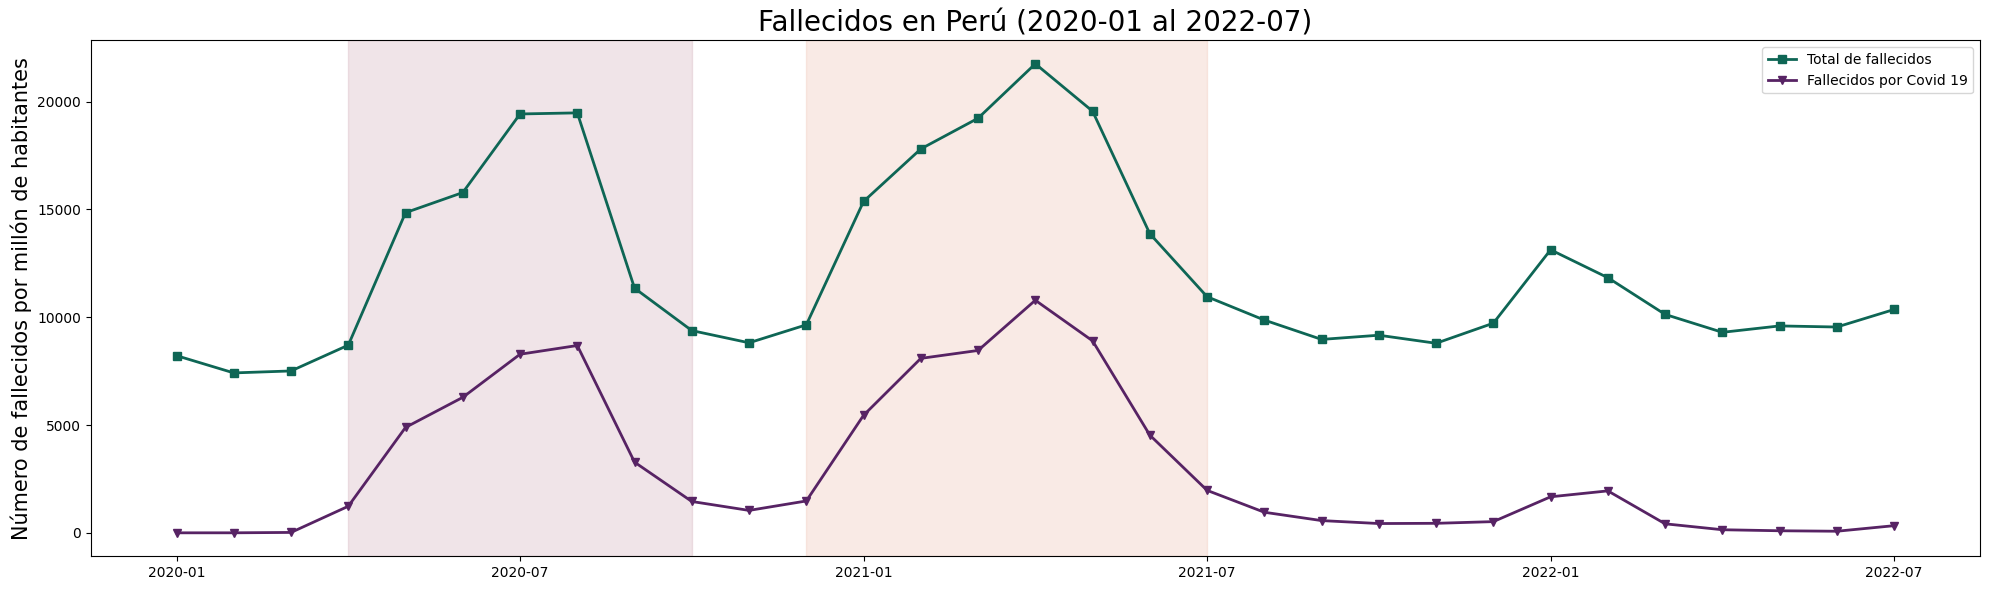

In [ ]:
# Configurar el tamaño del gráfico
#plt.rcParams["axes.facecolor"] = "#D1E9FF"
plt.figure(figsize=(20, 6))
#plt.style.use('dark_background')
plt.plot(final_dfm.loc['Total', '2020-01':'2022-07'].index, final_dfm.loc['Total', '2020-01':'2022-07'].values, color='#0E6655', label='Total de fallecidos', linewidth=2, marker='s')
plt.plot(final_dfc.loc['Total', '2020-01':'2022-07'].index, final_dfc.loc['Total', '2020-01':'2022-07'].values, color='#572364', label='Fallecidos por Covid 19', linewidth=2, marker='v')
# Resaltar el pico alto
max_fallecidos = np.amax(final_dfm.loc['Total'])
max_fallecidosc = np.amax(final_dfc.loc['Total'])
max_index = np.argmax(final_dfm.loc['Total'])
max_indexc = np.argmax(final_dfc.loc['Total'])
#plt.scatter(final_dfm.columns[max_index], max_fallecidos, color='red', s=100)#, label='Pico alto en total de fallecidos')
#plt.scatter(final_dfc.columns[max_indexc], max_fallecidosc, color='magenta')#, s=100, label='Pico alto en fallecidos por Covid 19')
# Marcar las dos olas del COVID-19
plt.axvspan('2020-04','2020-10', alpha=0.3, color='#CEA6B4')
plt.axvspan('2020-12','2021-07', alpha=0.3, color='#EDBCAA')
plt.xlabel('', fontsize=14)
plt.ylabel('Número de fallecidos por millón de habitantes', fontsize=15)
plt.title('Fallecidos en Perú (2020-01 al 2022-07)', fontsize=20)
plt.legend()
plt.xticks(final_dfm.columns[::6])
plt.tight_layout()